<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Apa itu Colaboratory?</h1>

Colaboratory, disingkat "Colab", memungkinkan Anda menulis dan mengeksekusi Python di browser Anda dengan beberapa keuntungan berikut:
- Tidak memerlukan konfigurasi
- Akses gratis ke GPU
- Berbagi dengan mudah

Apakah Anda seorang <strong>pelajar</strong>, <strong>data scientist</strong>, atau <strong>peneliti AI</strong>, Colab dapat memudahkan pekerjaan Anda. Tonton <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Pengantar Colab</a> untuk mempelajari lebih lanjut, atau langsung mulai di bawah ini.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("sample_data/dataR2.csv")

dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
dataset.groupby('Classification').size()

Classification
1    52
2    64
dtype: int64

In [ ]:
x = dataset.drop(["Classification"], axis=1)

x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
y = dataset["Classification"]

y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

In [ ]:
#import package model selection dari SKlearn
from sklearn.model_selection import train_test_split

In [ ]:
#membagi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20)

In [ ]:
#mengaktifkan package dan syntax untuk mengubahah skala data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#mengaktifkan package untuk klasifikasi KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error rata-rata')

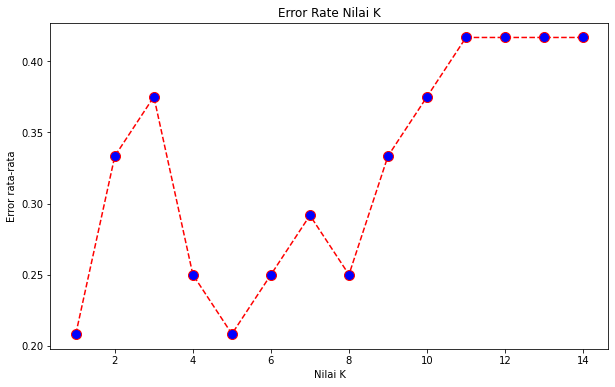

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error rata-rata')

In [ ]:
#mengaktifkan fungsi klasifikasi untuk KNN
knn = KNeighborsClassifier (n_neighbors=5)

In [ ]:
#memasukkan data training pada fungsi classifikasi untuk KNN
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict (x_test)

In [ ]:
knn.predict_proba(x_test)

array([[0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2]])

In [ ]:
#melihat keakuratan prediksi dengan data aktual
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 7  2]
 [ 3 12]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.78      0.74         9
           2       0.86      0.80      0.83        15

    accuracy                           0.79        24
   macro avg       0.78      0.79      0.78        24
weighted avg       0.80      0.79      0.79        24



In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.7916666666666666

In [ ]:
#prediksi data baru
bc = np.array([[20,21.000,50,2.7,0.5,7,8,9,500 ]])
knn.predict(bc)

array([2])